<a href="https://colab.research.google.com/github/KadjelRamkisoen/BertIR/blob/main_kadjel/BertIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Path to data files
# IR_Path = '/content/drive/MyDrive/UvAntwerpen/2021-2022/Information Retrieval/Assignment 2/'
IR_Path = '/content/drive/MyDrive/Information Retrieval/Assignment 2/'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dev_data = 'dev_data.csv'
all_docs = 'all_docs.csv'
dev_queries = 'dev_queries.csv'
test_data = 'test_data.csv'
training_data = 'training_data.csv'
lucene_data = 'raw_dev_Lucene_retrievals.csv'

In [21]:
!pip install sentence-transformers

     |████████████████████████████████| 78 kB 3.5 MB/s 
     |████████████████████████████████| 3.1 MB 17.2 MB/s 
     |████████████████████████████████| 3.3 MB 34.7 MB/s 
     |████████████████████████████████| 1.2 MB 36.7 MB/s 
     |████████████████████████████████| 59 kB 6.4 MB/s 
     |████████████████████████████████| 895 kB 76.1 MB/s 
     |████████████████████████████████| 596 kB 55.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=8f08ea54fa0f48329b43e52d846f202a34a26c295a8da264767663a9fce8d1a9
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# df = pd.read_csv(IR_Path + dev_data)
df = pd.read_csv(IR_Path + all_docs)
# df = pd.read_csv(IR_Path + dev_queries)
# df = pd.read_csv(IR_Path + test_data)
# df = pd.read_csv(IR_Path + training_data)
# df = pd.read_csv(IR_Path + lucene_data)

In [ ]:
# Read first 5 lines
df.head()

,doc_number,doc_text
0,31135,Estrogen patch types Common Questions and Answ...
1,317907,Answers.com ® Wiki Answers ® Categories Cars &...
2,188074,Vodka Tonic (7)Recipe by newspapergal“I couldn...
3,313468,"From Wikipedia, the free encyclopedia (Redirec..."
4,33071,1. Biogenic elements. Qualitative reaction for...


In [ ]:
# Check the column tyes
df["doc_text"] = df["doc_text"].astype('str')
df.dtypes

doc_number     int64
doc_text      object
dtype: object

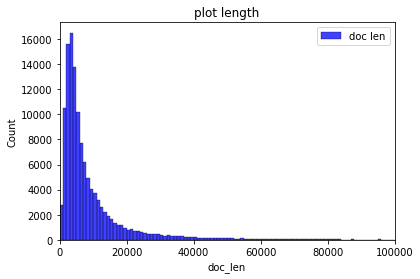

In [ ]:
df['doc_len'] = df['doc_text'].apply(lambda words: len(words))
sns.histplot(df['doc_len'], bins=100, kde=False, color='b', label='doc len', binrange= [0,100000])
plt.title('plot length'); 
plt.legend()
plt.xlim([0, 100000])
plt.show()

In [20]:
model = SentenceTransformer('msmarco-distilbert-base-dot-prod-v3')

ModuleNotFoundError: ignored